In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'
df = pd.read_csv(data)

## Explore transformations

In [51]:
msrp = df.MSRP
msrp_log = np.log1p(msrp)
msrp_boxcox = stats.boxcox(msrp)[0]

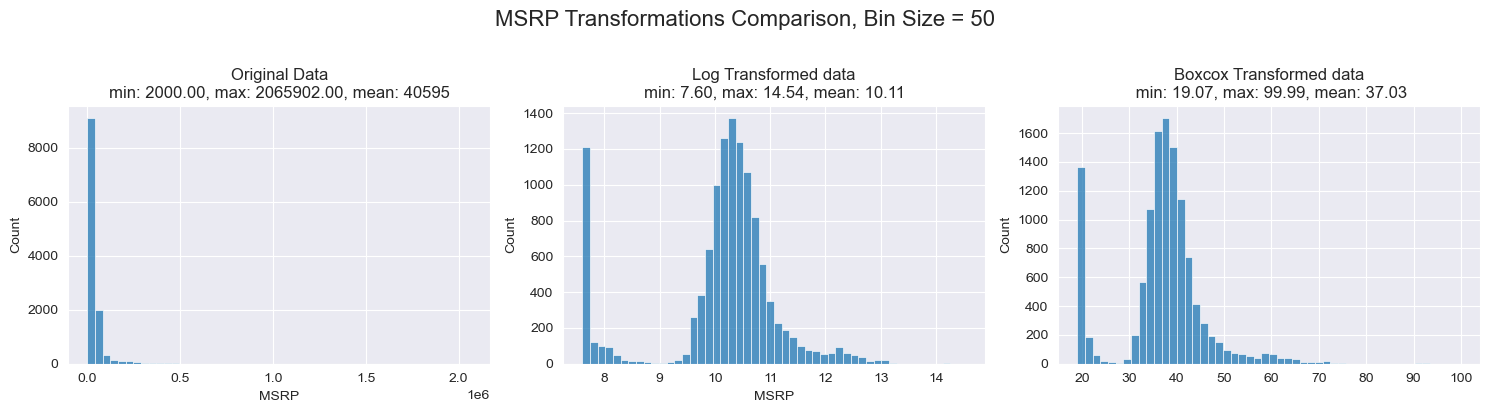

In [50]:
bin = 50
fig, ax=plt.subplots(1,3, figsize=(15,4))
sns.histplot(msrp, ax=ax[0], bins=bin)
ax[0].set_title("Original Data\n"
                "min: {:.2f}, max: {:.2f}, mean: {:.0f}".format(msrp.min(), msrp.max(), msrp.mean()))
sns.histplot(msrp_log, ax=ax[1], bins=bin)
ax[1].set_title("Log Transformed data\n"
                "min: {:.2f}, max: {:.2f}, mean: {:.2f}".format(msrp_log.min(), msrp_log.max(), msrp_log.mean()))
sns.histplot(msrp_boxcox, ax=ax[2], bins=bin)
ax[2].set_title("Boxcox Transformed data\n "
                "min: {:.2f}, max: {:.2f}, mean: {:.2f}".format(msrp_boxcox.min(), msrp_boxcox.max(), msrp_boxcox.mean()))
fig.suptitle(f"MSRP Transformations Comparison, Bin Size = {bin}", fontsize=16, y=1.02, ) # gap between suptitle and figure
plt.tight_layout()
plt.show()

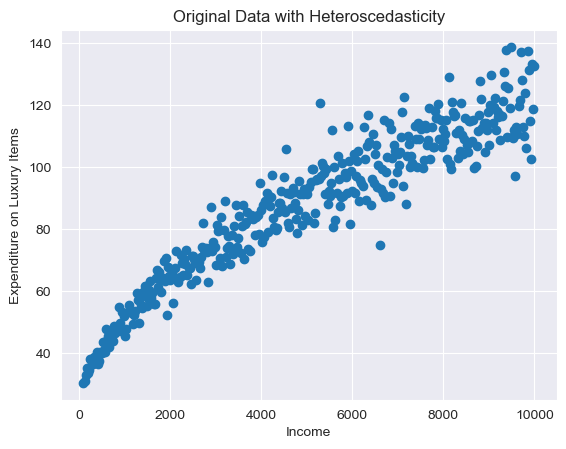

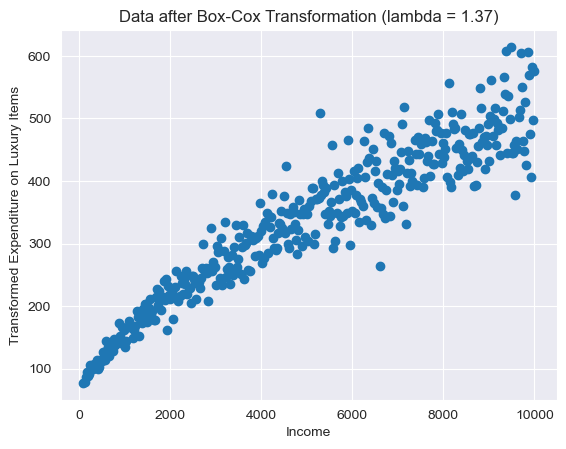

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Generate simulated data
x = np.linspace(100, 10_000, 400)
y = x**0.5 * (1 + 0.1 * np.random.randn(400)) + 20  # Adjusting simulation to ensure positive values

# Plot the data
plt.scatter(x, y)
plt.title("Original Data with Heteroscedasticity")
plt.xlabel("Income")
plt.ylabel("Expenditure on Luxury Items")
plt.show()

# Apply Box-Cox transformation to y
y_transformed, lambda_optimal = stats.boxcox(y)

# Plot the transformed data
plt.scatter(x, y_transformed)
plt.title(f"Data after Box-Cox Transformation (lambda = {lambda_optimal:.2f})")
plt.xlabel("Income")
plt.ylabel("Transformed Expenditure on Luxury Items")
plt.show()

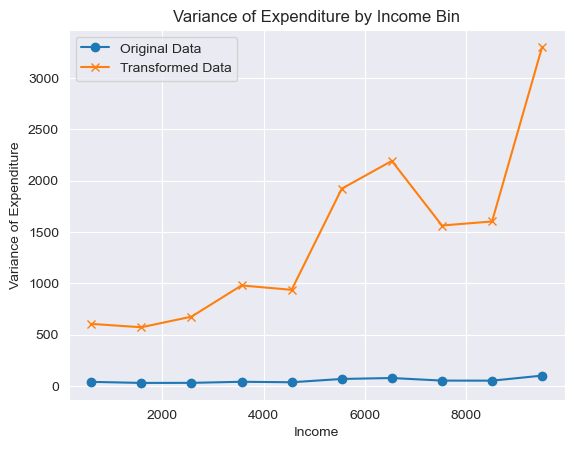

In [99]:
# Define the number of bins
num_bins = 10
bins = np.linspace(x.min(), x.max(), num_bins + 1)

# Calculate variance for each bin
variances_original = [np.var(y[(x >= bins[i]) & (x < bins[i + 1])]) for i in range(num_bins)]
variances_transformed = [np.var(y_transformed[(x >= bins[i]) & (x < bins[i + 1])]) for i in range(num_bins)]

# Plot the variances
bin_centers = (bins[:-1] + bins[1:]) / 2

plt.plot(bin_centers, variances_original, marker='o', label='Original Data')
plt.plot(bin_centers, variances_transformed, marker='x', label='Transformed Data')
plt.xlabel('Income')
plt.ylabel('Variance of Expenditure')
plt.title('Variance of Expenditure by Income Bin')
plt.legend()
plt.show()


## Prep datasets for training and validation

In [64]:
# drop columns with missing values
drop_cols = df.columns[df.isnull().sum() > 0]
df = df.drop(columns=drop_cols)

In [74]:
# filter our columns that are not numeric
df = df.select_dtypes(include=np.number)

In [78]:
df['age'] = 2023 - df.Year
df = df.drop(columns='Year')

In [93]:
df.shape[0] * .8

9531.2

In [134]:
#y = np.array(msrp)
y = np.array(msrp_boxcox)
X = df.drop(columns='MSRP').values

In [135]:
y_train = y[:7148]
X_train = X[:7148]

In [136]:
y_val = y[7148:9531]
X_val = X[7148:9531]

In [137]:
y_test = y[9531:]
X_test = X[9531:]

## Implement Linear Regression

In [54]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [101]:
def predict(X, w0, w):
    return w0 + X.dot(w)

In [100]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [138]:
w0, w = train_linear_regression(X_train, y_train)

In [139]:
y_pred = predict(X_val, w0, w)

In [140]:
rmse(y_val, y_pred)

5.37765303876478

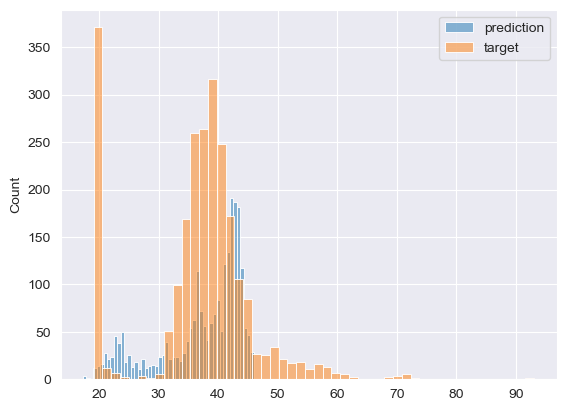

In [141]:
sns.histplot(y_pred, bins=50, label='prediction', alpha=0.5)
sns.histplot(y_val, bins=50, label='target', alpha=0.5)
plt.legend()

Text(0, 0.5, 'Prediction')

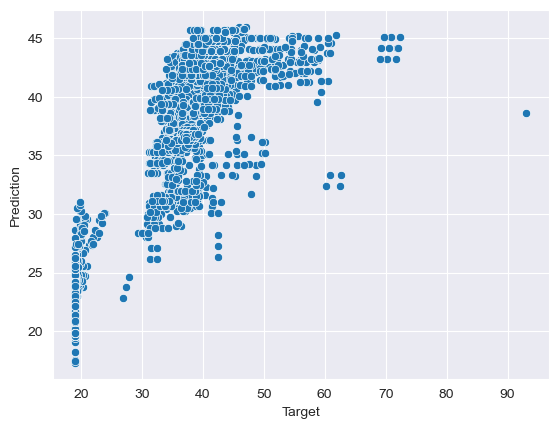

In [142]:
sns.scatterplot(x=y_val, y=y_pred)
plt.xlabel('Target')
plt.ylabel('Prediction')